# Ficha de Trabalho 1

In [1]:
#imports
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.optimize import basinhopping, root, fsolve
import numdifftools as nd

Criar o modelo para a bactéria BL21

In [2]:
# Model bl21
def bl21(t, Y, params):

    """

    This will be the model for the strain BL21

    :param t: time; This argument should not be altered
    :param Y: initial conditions; array-like data structure (list, tuple, numpy array)
    :param params: parameters; array-like data structure (list, tuple, numpy array)
    :return: K * phi - (D * variables) + zeros; note that numpy.dot() is the standard for matrices multiplication

    """

    return

## a)-b)

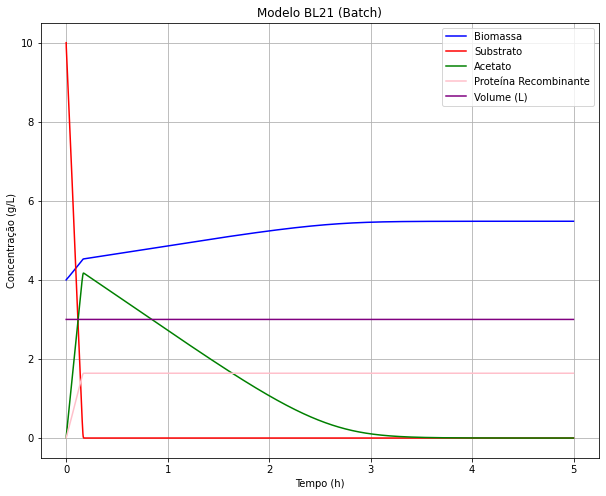

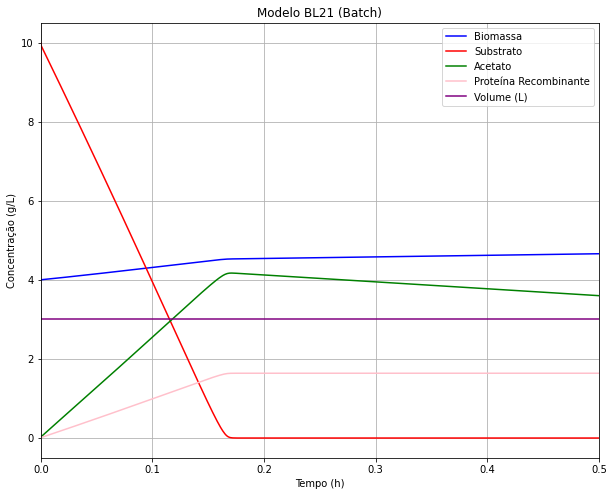

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

# Model bl21 batch
def bl21_b(t, y, params):
    X, S, A, P = y
    k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0 = params
    u1 = 0.2 * (S / (0.1 + S))
    u2 = 0.5 * (S / (0.1 + S))
    u3 = 0.1 * (A / (0.6 + A))
    reac = [u1*X + u2*X + u3*X, -k1*u1*X - k2*u2*X, k3*u2*X - k4*u3*X, k11*u1*X] #X, S, A, P || usando as reacoes de crescimento
    return reac

# Initial conditions
X0= 4 #g/L
S0= 10 #g/L
A0= 0 #g/L
P0= 0 #g/L

# Parameters
k1= 5.164
k2= 27.22
k3= 12.90
k4= 4.382
k5= 2.074
k6= 10.89
k7= 4.098
k8= 2.283
k9= 17.01
k10= 4.576
k11= 12.0
V0= 3 #como é batch o volume não se altera

#lista com os valores iniciais fornecida a func
y0= [X0, S0, A0, P0]

#lista com os parametros fornecida a func
params= [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0]

t0= 0 #tempo inicial
t= 5 #tempo final
dt= 0.001 #intervalo de tempo entre reads

# Call the ODE solver
r = ode(bl21_b).set_integrator('lsoda', method='bdf', lband= 0) #lband é o limite inferior -- para nao haver valores negativos
r.set_initial_value(y0, t0).set_f_params(params)


#storing variables
T, x, s, a, p= [], [], [], [], []

while r.successful() and r.t < t:
    time= r.t + dt
    T.append(r.t)
    x.append(r.integrate(time)[0])
    s.append(r.integrate(time)[1])
    a.append(r.integrate(time)[2])
    p.append(r.integrate(time)[3])
    #print(time, r.integrate(time))


# using the storing variables to plot
T = np.array([0] + T)
x = np.array([y0[0]] + x)
s = np.array([y0[1]] + s)
a = np.array([y0[2]] + a)
p = np.array([y0[3]] + p)


#plot
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.plot(T, x, label='Biomassa', color='blue')
ax.plot(T, s, label='Substrato', color='red')
ax.plot(T, a, label='Acetato', color='green')
ax.plot(T, p, label='Proteína Recombinante', color='pink')
ax.plot(T, [V0] * len(T), label='Volume (L)', color='purple')
ax.legend(loc='best')
ax.set_xlabel('Tempo (h)')
ax.set_ylabel('Concentração (g/L)')
ax.set_title('Modelo BL21 (Batch)')
plt.grid()
plt.show()

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.plot(T, x, label='Biomassa', color='blue')
ax.plot(T, s, label='Substrato', color='red')
ax.plot(T, a, label='Acetato', color='green')
ax.plot(T, p, label='Proteína Recombinante', color='pink')
ax.plot(T, [V0] * len(T), label='Volume (L)', color='purple')
ax.legend(loc='best')
ax.set_xlabel('Tempo (h)')
ax.set_ylabel('Concentração (g/L)')
ax.set_title('Modelo BL21 (Batch)')
plt.xlim(0., 0.5)
plt.grid()
plt.show()

## c)-d)

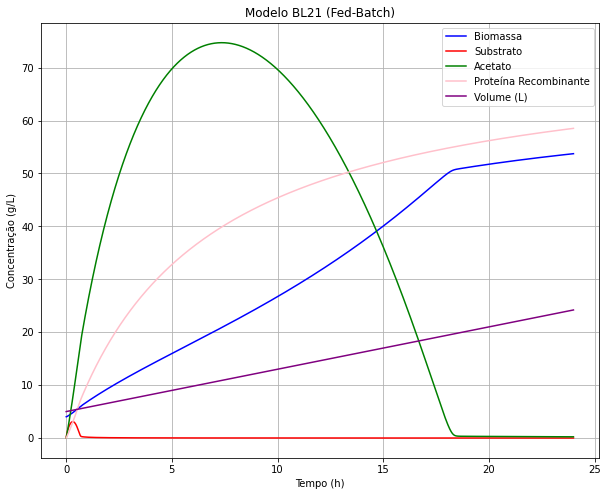

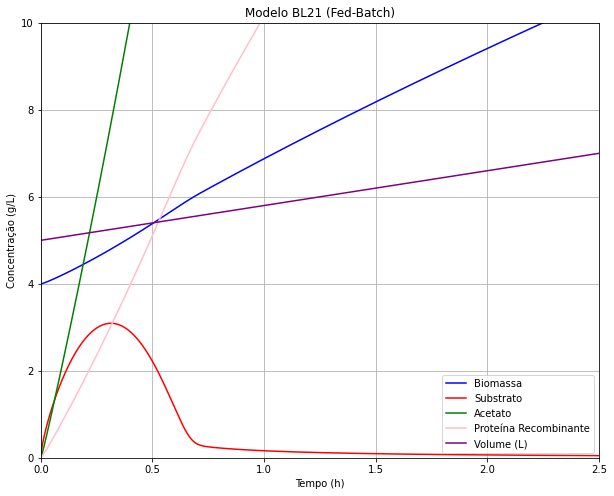

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

# Model bl21 fed batch
def bl21_fb(t, y, params):
    X, S, A, P, V = y
    k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se = params
    u1 = 0.2 * (S / (0.1 + S))
    u2 = 0.5 * (S / (0.1 + S))
    u3 = 0.1 * (A / (0.6 + A))
    D= Fe / V
    reac = [u1*X + u2*X + u3*X - D*X, -k1*u1*X - k2*u2*X - D*S + D*Se, k3*u2*X - k4*u3*X - D*A, k11*u1*X - D*P, Fe] #X, S, A, P, V || usando as reacoes de crescimento
    return reac

# Initial conditions
X0= 4 #g/L
S0= 0 #g/L
A0= 0 #g/L
P0= 0 #g/L
V= 5 #L

# Parameters
k1= 5.164
k2= 27.22
k3= 12.90
k4= 4.382
k5= 2.074
k6= 10.89
k7= 4.098
k8= 2.283
k9= 17.01
k10= 4.576
k11= 12.0
V0= 5 #o volume inicial não se altera
Fe= 0.8 #L/h || caudal de entrada || 350 g/L glucose
Se= 450 #concentração do substrato de entrada g/L

#lista com os valores iniciais fornecida a func
y0= [X0, S0, A0, P0, V]

#lista com os parametros fornecida a func
params= [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se]

t0= 0 #tempo inicial
t= 24 #tempo final
dt= 0.001 #intervalo de tempo entre reads


# Call the ODE solver
r = ode(bl21_fb).set_integrator('lsoda', method='bdf', lband=0) #lband é o limite inferior -- para nao haver valores negativos
r.set_initial_value(y0, t0).set_f_params(params)


#storing variables
T, x, s, a, p, v= [], [], [], [], [], []

while r.successful() and r.t < t:
    time= r.t + dt
    T.append(r.t)
    x.append(r.integrate(time)[0])
    s.append(r.integrate(time)[1])
    a.append(r.integrate(time)[2])
    p.append(r.integrate(time)[3])
    v.append(r.integrate(time)[4])
    #print(time, r.integrate(time))


# Plotting
T = np.array([0] + T)
x = np.array([y0[0]] + x)
s = np.array([y0[1]] + s)
a = np.array([y0[2]] + a)
p = np.array([y0[3]] + p)
v = np.array([y0[4]] + v)

#plot
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.plot(T, x, label='Biomassa', color='blue')
ax.plot(T, s, label='Substrato', color='red')
ax.plot(T, a, label='Acetato', color='green')
ax.plot(T, p, label='Proteína Recombinante', color='pink')
ax.plot(T, v, label='Volume (L)', color='purple')
ax.legend(loc='best')
ax.set_xlabel('Tempo (h)')
ax.set_ylabel('Concentração (g/L)')
ax.set_title('Modelo BL21 (Fed-Batch)')
plt.grid()
plt.show()

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.plot(T, x, label='Biomassa', color='blue')
ax.plot(T, s, label='Substrato', color='red')
ax.plot(T, a, label='Acetato', color='green')
ax.plot(T, p, label='Proteína Recombinante', color='pink')
ax.plot(T, v, label='Volume (L)', color='purple')
ax.legend(loc='best')
ax.set_xlabel('Tempo (h)')
ax.set_ylabel('Concentração (g/L)')
ax.set_title('Modelo BL21 (Fed-Batch)')
plt.xlim(0., 2.5)
plt.ylim(0., 10)
plt.grid()
plt.show()

## e) 

Criar modelo para a bactéria JM109

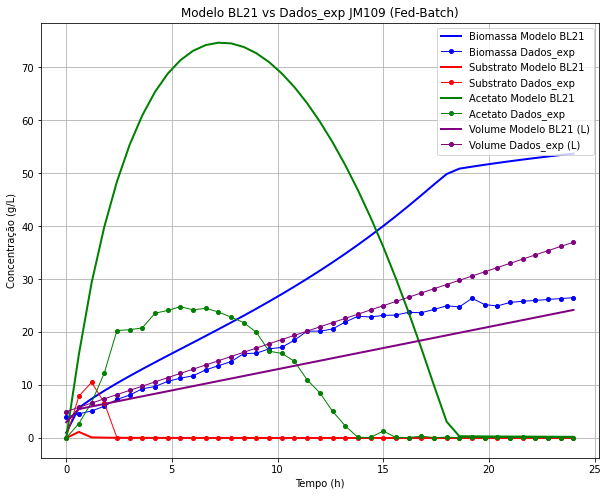

c:\Users\35193\anaconda3\envs\projeto_bioinf\lib\site-packages\scipy\integrate\_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
c:\Users\35193\anaconda3\envs\projeto_bioinf\lib\site-packages\scipy\integrate\_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
c:\Users\35193\anaconda3\envs\projeto_bioinf\lib\site-packages\scipy\integrate\_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
c:\Users\35193\anaconda3\envs\projeto_bioinf\lib\site-packages\scipy\integrate\_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


                        fun: 34254.81999110704
 lowest_optimization_result:       fun: 34254.81999110704
 hess_inv: array([[ 0.02080846, -0.1239885 ,  0.07162727],
       [-0.1239885 ,  0.73879318, -0.42679563],
       [ 0.07162727, -0.42679563,  0.24655687]])
      jac: array([12377429.51123047,  8476090.49414062, 10294123.70751953])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 160
      nit: 2
     njev: 37
   status: 2
  success: False
        x: array([13.50945035,  0.5754241 ,  1.25010977])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 26
                       nfev: 5515
                        nit: 25
                       njev: 1306
                    success: False
                          x: array([13.50945035,  0.5754241 ,  1.25010977])
Os mínimos encontrados são [13.50945035  0.5754241   1.25010977].


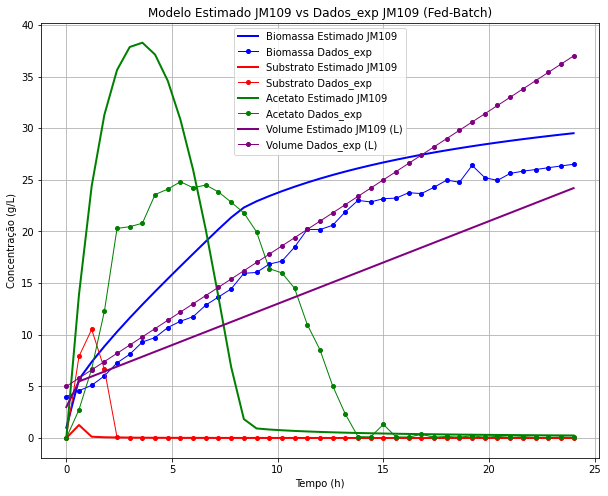

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.optimize import basinhopping


dados_exp= pd.read_excel('dados_exp_3.xlsx', engine="openpyxl").to_numpy().tolist()
for i in range(len(dados_exp)): #retira a coluna do tempo(T) para ter uma matriz igual à Y dos estimados
    dados_exp[i].pop(0)


def bl21_FB(t, y, params):
    X, S, A, P, V = y
    k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se, umax3, Ks3 = params
    u1 = 0.2 * (S / (0.1 + S))
    u2 = 0.5 * (S / (0.1 + S))
    u3 = umax3 * (A / (Ks3 + A))
    D= Fe / V
    reac = [u1*X + u2*X + u3*X - D*X, -k1*u1*X - k2*u2*X - D*S + D*Se, k3*u2*X - k4*u3*X - D*A, k11*u1*X - D*P, Fe] #X, S, A, P, V || usando as reacoes de crescimento
    return reac

def run_ode(modelo, param):
    global y0
    r = ode(modelo).set_integrator('lsoda', method='bdf', lband=0, nsteps=5000)  # lband é o limite inferior -- para nao haver valores negativos
    r.set_initial_value(y0, t0).set_f_params(param)

    Y = [[4, 0, 0, 0, 5]]  # variavel Y com os dados iniciais

    while r.successful() and r.t < t:
        time = r.t + dt
        Y.append(r.integrate(time).tolist())

    for i in range(len(Y)):  # retira a coluna da proteina(P) para ter uma matriz igual à dos dados experimentais
        Y[i].pop(3)
    return Y

modelo = bl21_FB

# Initial conditions
X0 = 4 #g/L  BL21=4  dados_exp=1
S0 = 0 #g/L
A0 = 0 #g/L
P0 = 0 #g/L
V = 5 #L  BL21=8  dados_exp=3

#lista com os valores iniciais fornecida a func
y0 = [X0, S0, A0, P0, V]

# Final time and step
t0= 0 #tempo inicial
t= 24 #tempo final
dt= 0.6 #intervalo de tempo entre reads

# Parameters
k1= 5.164
k2= 27.22
k3= 12.90
k4= 4.382
k5= 2.074
k6= 10.89
k7= 4.098
k8= 2.283
k9= 17.01
k10= 4.576
k11= 12.0
V0= 5 #o volume inicial não se altera
Fe= 0.8 #L/h || caudal de entrada || 450 g/L glucose
Se= 450 #concentração do substrato de entrada g/L
umax3 = 0.1
Ks3 = 0.6

#lista com os parametros fornecida a func
param= [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se, umax3, Ks3]

inicial = run_ode(modelo, param)

Yx, Ys, Ya, Yv = [], [], [], []
DEx, DEs, DEa, DEv = [], [], [], []
T = [0]

for i in range(40): #criar a lista com os tempos para fazer os graficos
    T.append(T[i]+0.6)


for i in range(len(inicial)): #separar as colunas da matriz dos estimados para obter os valores para fazer o grafico
    Yx.append(inicial[i][0])
    Ys.append(inicial[i][1])
    Ya.append(inicial[i][2])
    Yv.append(inicial[i][3])

for i in range(len(dados_exp)): #separar as colunas da matriz dos dados experimentais para obter os valores para fazer o grafico
    DEx.append(dados_exp[i][0])
    DEs.append(dados_exp[i][1])
    DEa.append(dados_exp[i][2])
    DEv.append(dados_exp[i][3])


#grafico conjunto inicial
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.plot(T, Yx, linewidth=2, label='Biomassa Modelo BL21', color='blue')
ax.plot(T, DEx, 'o-', markersize=4, linewidth=1, label='Biomassa Dados_exp', color='blue')
ax.plot(T, Ys, linewidth=2, label='Substrato Modelo BL21', color='red')
ax.plot(T, DEs, 'o-', markersize=4, linewidth=1, label='Substrato Dados_exp', color='red')
ax.plot(T, Ya, linewidth=2, label='Acetato Modelo BL21', color='green')
ax.plot(T, DEa, 'o-', markersize=4, linewidth=1, label='Acetato Dados_exp', color='green')
ax.plot(T, Yv, linewidth=2, label='Volume Modelo BL21 (L)', color='purple')
ax.plot(T, DEv, 'o-', markersize=4, linewidth=1, label='Volume Dados_exp (L)', color='purple')
ax.set_xlabel('Tempo (h)')
ax.set_ylabel('Concentração (g/L)')
ax.set_title('Modelo BL21 vs Dados_exp JM109 (Fed-Batch)')
ax.legend(loc='best')
plt.grid()
plt.show()


def jm109(t, y, params):
    '''
    This will be the model for the strain JM109 which is similar to the BL21, but it should have slight modifications
    :param t: time; This argument should not be altered
    :param Y: initial conditions; array-like data structure (list, tuple, numpy array)
    :param params: parameters; array-like data structure (list, tuple, numpy array) - NOTE THAT THESE ARGUMENT MUST
    CONTAIN ONLY AND ONLY THOSE PARAMETERS TO BE ESTIMATED. The remain parameters should be hardcoded within the
    function
    :return: K * phi - (D * variables) + zeros; note that numpy.dot() is the standard for matrices multiplication
    '''

    X, S, A, P, V = y
    k3, umax3, Ks3 = params

    u1 = 0.2 * (S / (0.1 + S))
    u2 = 0.5 * (S / (0.1 + S))
    u3 = umax3 * (A / (Ks3 + A))
    
    D = 0.8 / V
    reac = [u1 * X + u2 * X + u3 * X - D * X, -5.164 * u1 * X - 27.22 * u2 * X - D * S + D * 450, k3 * u2 * X - 4.382 * u3 * X - D * A, 12 * u1 * X - D * P, 0.8] # X, S, A, P, V || usando as reacoes de crescimento
    return reac


def estimate(params):
    """
    This will be our estimate function that works out as the calculation of the difference between the experimental
    and predicted values and can be used as the objective function
    :param params: parameters; array-like data structure (list, tuple, numpy array) for the ode
    :return: the error between measured and predicted data, i.e. difS + difX + difA + difV
    """

    global model
    global t
    global t0
    global dt
    global dados_exp
    global y0
    global Y
    global soma1
    global Y_legit

    r = ode(model).set_integrator('lsoda', method='bdf', lband=0, nsteps=5000)  # lband é o limite inferior -- para nao haver valores negativos
    r.set_initial_value(y0, t0).set_f_params(params)

    Y = [[4, 0, 0, 0, 5]] #variavel Y com os dados iniciais

    while r.successful() and r.t < t:
        time = r.t + dt
        Y.append(r.integrate(time).tolist())
    for i in range(len(Y)): #retira a coluna da proteina(P) para ter uma matriz igual à dos dados experimentais
        Y[i].pop(3)
    if len(Y) == len(dados_exp): #a função só vai executar isto quando os tamanhos das 2 matrizes forem iguais
        #isto é necessário porque a ODE estava a terminar com uma matriz com menos linhas e não permitia a execução do calculo do erro
        #o anterior acontecia porque a ODE não estava a conseguir integrar com sucesso (while r.successful no chunk acima)
        #para evitar isto fizemos com que o basinhopping use os valores anteriores da ODE caso a atual execução da mesma dê o tal erro
        Y_legit= Y #guardar numa variavel diferente para no final conseguir usar a matriz dos estimados sem as falhas faladas anteriormente
        #diferenca= np.subtract(Y, dados_exp)
        #print('entrou')
        
        diferenca = np.subtract(Y_legit, dados_exp) #diferença entre os valores
        po = np.power(diferenca, 2) #diferença ao quadrado
        soma= po.sum(axis=0) #soma dos quadrados das diferenças
        soma1= soma.sum() #soma das somas dos quadrados das diferenças
    return soma1 #soma dos quadrados das diferenças


# Bounds
# Consider using the following class for setting the Simulated Annealing bounds
class Bounds(object):

    def __init__(self, LB=None, UB=None):

        if LB is None:
         
            LB = [0, 0, 0]

        if UB is None:
            UB = [4, 4, 4]

        self.lower_bound = np.array(LB)
        self.upper_bound = np.array(UB)

    def __call__(self, **kwargs):

        x = kwargs["x_new"]

        tmax = bool(np.all(x <= self.upper_bound))
        tmin = bool(np.all(x >= self.lower_bound))

        return tmax and tmin


#Bounds
LB = [0, 0, 0]
UB = [4, 4, 4]
bounds = Bounds(LB, UB)

model = jm109

# initial guess, that is the initial values for the parameters to be estimated. It can be those available in the pdf
x0 = [12.90, 0.1, 0.6]

minimizer_kwargs = {"method": "BFGS"} #method BFGS

for_real = basinhopping(estimate, x0, minimizer_kwargs=minimizer_kwargs, niter=25, accept_test=bounds, seed=1)
#tentar = basinhopping(estimate, x0, minimizer_kwargs=minimizer_kwargs, accept_test=bounds, niter=1, seed=1) #niter_success para a otimização caso o mínimo se mantenha igual em n iterações sucessivas
param_est = for_real.x
print(for_real)
print('Os mínimos encontrados são {}.'.format(param_est))

#redefinir os parametros para os minimos estimados
k3 = param_est[0]
umax3 = param_est[1]
Ks3 = param_est[2]

#lista com os parametros fornecida a func
param = [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se, umax3, Ks3]

modelo = bl21_FB

final = run_ode(modelo, param)

Yx, Ys, Ya, Yv = [], [], [], []

for i in range(len(final)): #separar as colunas da matriz dos estimados para obter os valores para fazer o grafico
    Yx.append(final[i][0])
    Ys.append(final[i][1])
    Ya.append(final[i][2])
    Yv.append(final[i][3])


#grafico conjunto final
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.plot(T, Yx, linewidth=2, label='Biomassa Estimado JM109', color='blue')
ax.plot(T, DEx, 'o-', markersize=4, linewidth=1, label='Biomassa Dados_exp', color='blue')
ax.plot(T, Ys, linewidth=2, label='Substrato Estimado JM109', color='red')
ax.plot(T, DEs, 'o-', markersize=4, linewidth=1, label='Substrato Dados_exp', color='red')
ax.plot(T, Ya, linewidth=2, label='Acetato Estimado JM109', color='green')
ax.plot(T, DEa, 'o-', markersize=4, linewidth=1, label='Acetato Dados_exp', color='green')
ax.plot(T, Yv, linewidth=2, label='Volume Estimado JM109 (L)', color='purple')
ax.plot(T, DEv, 'o-', markersize=4, linewidth=1, label='Volume Dados_exp (L)', color='purple')
ax.set_xlabel('Tempo (h)')
ax.set_ylabel('Concentração (g/L)')
ax.set_title('Modelo Estimado JM109 vs Dados_exp JM109 (Fed-Batch)')
ax.legend(loc='best')
plt.grid()
plt.show()



F

In [22]:
import sympy as sp
# Valores iniciais das variáveis
# Y = [X, S, A, P, V]
y0 = [4., 0., 0., 0., 5.]


# Parâmetros minimizantes (aprox.) -> k3, umax3, ks3
params=[13.50945035,0.5754241,1.25010977]
k3,umax3,ks3 = params

# Parâmetros k (exceto k3)
k1,k2,k4,k5,k6,k7,k8,k9,k10,k11 = [5.164,27.22, 4.382, 2.074, 10.89, 4.098, 2.283, 17.01, 4.576, 12]

# Parâmetros umax (exceto umax3)
umax1 = 0.2
umax2 = 0.5

# Parâmetros ks (exceto ks3)
ks2 = 0.1
ks1 = 0.1


# Consider using sympy.symbols to create algebric variables to be used on the derivatives (X, S, k1, ks1, ...)

# Criar símbolos algébricos para as variáveis utilizando a função "symbols" do package SymPy
(X,S,A,P,V,K1,K2,K3,Umax1,Umax2,Umax3,Ks1,Ks2,Ks3,Fe,Se) = sympy.symbols('X,S,A,P,V,k1,k2,k3,umax1,umax2,umax3,Ks1,Ks2,Ks3,Fe,Se', real=True)

# Parâmetros mu
u1 = Umax1 * (S / (Ks1 + S))
u2 = Umax2 * (S / (Ks2 + S))
u3 = Umax3 * (A / (Ks3 + A))

# ODEs relativas a X e S
dxdt = u1*X + u2*X + u3*X - Fe/V*X
dsdt = -K1*u1*X - K2*u2*X - Fe/V*S + Fe/V*Se


# Calcular as derivadas parciais de dX/dt e dS/dt em função de k3, umax3 e ks3, usando a função "diff" do package SymPy
dXk3 = sp.diff(dxdt, k3)
dXks3 = sp.diff(dxdt, Ks3)
dXumax3 = sp.diff(dxdt, Umax3)

dSk3 = sp.diff(dsdt, k3)
dSks3 = sp.diff(dsdt, Ks3)
dSumax3 = sp.diff(dsdt, Umax3)


# Criar funções para substituir incógnitas das funções das derivadas parciais, usando a função "lambdify" do package SymPy
dXk3 = sp.lambdify((), dXk3, "numpy")
dXks3 = sp.lambdify((X, S, Ks3, Umax3), dXks3, "numpy")
dXumax3 = sp.lambdify((X, S, Ks3), dXumax3, "numpy")
dSk3 = sp.lambdify((X, S, Ks3, Umax3), dSk3, "numpy")
dSks3 = sp.lambdify((X, S, Ks3, Umax3, K3), dSks3, "numpy")
dSumax3 = sp.lambdify((X, S, Ks3, K3), dSumax3, "numpy")


t0 = 0    #Tempo inicial
t1 = 24 #Tempo final
dt = 0.01 #Passo

# ode
res = ode(jm109).set_integrator("lsoda", method="bdf", lband=0) # nsteps=10000
res.set_initial_value(y0, t0).set_f_params(params)

# Listas para guardar os valores das sensibilidades ao longo do tempo
T,dxk3,dxks3,dxumax3,dsk3,dsks3,dsumax3 = [],[],[],[],[],[],[]

# Resolução da ode para cada passo de tempo
while res.successful() and res.t < t1:
    result = res.integrate(res.t+dt)
    x,s,a,p,v = result
    
    T.append(res.t)
    
    dxk3.append(dXk3())
    dxks3.append(dXks3(x,s,ks3,umax3))
    dxumax3.append(dXumax3(x,s,ks3))
    
    dsk3.append(dSk3(x,s,ks3,umax3))
    dsks3.append(dSks3(x,s,ks3,umax3,k3))
    dsumax3.append(dSumax3(x,s,ks3,k3))


# Criar gráficos das sensibilidades de X em função de k3, umax3 e ks3
fig, ax = plt.subplots(3,2)
fig.set_figheight(8)
fig.set_figwidth(10)
ax[0,0].plot(T, dxk3, linewidth=2, linestyle='solid', label='dX/dK3', color='lightblue')
ax[0,0].set_title('Sensibilidade do X')
ax[0,0].get_yaxis().set_label_coords(-0.20,0.5)
ax[0,0].legend()
ax[0,0].set_ylabel('Sensibilidade a K1')
ax[1,0].get_yaxis().set_label_coords(-0.2,0.5)
ax[1,0].plot(T, dxumax3, linewidth=2, linestyle='solid', label='dX/dumax3', color='blue')
ax[1,0].legend()
ax[1,0].set_ylabel('Sensibilidade a umax1')
ax[2,0].plot(T, dxks3, linewidth=2, linestyle='solid', label='dX/dKs3', color='darkblue')
ax[2,0].legend()
ax[2,0].set_ylabel('Sensibilidade a Ks1')
ax[2,0].get_yaxis().set_label_coords(-0.2,0.5)
ax[2,0].set_xlabel('Tempo (h)')

# Criar gráficos das sensibilidades de S em função de k3, umax3 e ks3
ax[0,1].plot(T, dsk3, linewidth=2, linestyle='solid', label='dS/dK3', color='salmon')
ax[0,1].set_title('Sensibilidade do S')
ax[0,1].legend()
ax[1,1].plot(T, dsumax3, linewidth=2, linestyle='solid', label='dS/dumax3', color='red')
ax[1,1].legend()
ax[2,1].plot(T, dsks3, linewidth=2, linestyle='solid', label='dS/dKs3', color='darkred')
ax[2,1].legend()
ax[2,1].set_xlabel('Tempo (h)')

fig.subplots_adjust(left=0.2, wspace=0.2)

ValueError: 
Can't calculate derivative wrt 13.5094503500000.

## g)

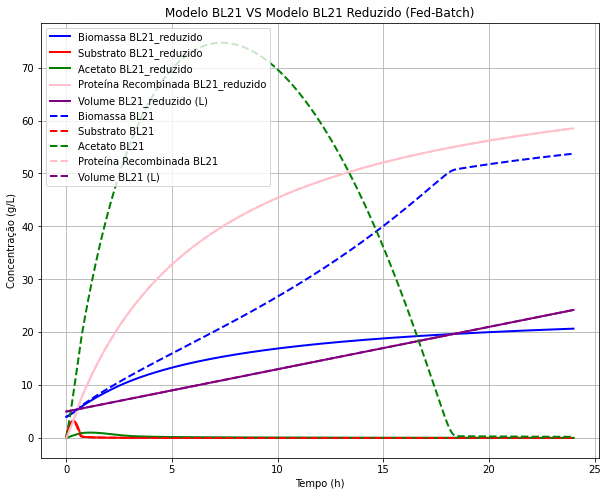

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode


def bl21_FB(t, y, params):
    X, S, A, P, V = y
    k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se = params
    u1 = 0.2 * (S / (0.1 + S))
    u2 = 0.5 * (S / (0.1 + S))
    u3 = 0.1 * (A / (0.6 + A))
    D= Fe / V
    reac = [u1*X + u2*X + u3*X - D*X,
            -k1*u1*X - k2*u2*X - D*S + D*Se,
            k3*u2*X - k4*u3*X - D*A,
            k11*u1*X - D*P,
            Fe] #X, S, A, P, V || usando as reacoes de crescimento
    return reac

def bl21_FB_redux(t, y, params):
    # assumindo que k 3 tem sensibilidade nula
    X, S, A, P, V = y
    k1, k2, k3, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se = params
    u1 = 0.2 * (S / (0.1 + S))
    u2 = 0.5 * (S / (0.1 + S))
    u3 = 0.1 * (A / (0.6 + A))
    D= Fe / V
    reac = [u1*X + u2*X + u3*X - D*X,
            -k1*u1*X - k2*u2*X - D*S + D*Se,
            1*u2*X - k4*u3*X - D*A,
            k11*u1*X - D*P,
            Fe] #X, S, A, P, V || usando as reacoes de crescimento
    return reac


# Initial conditions
X0= 4 #g/L
S0= 0 #g/L
A0= 0 #g/L
P0= 0 #g/L
V= 5 #L

# Parameters
k1= 5.164
k2= 27.22
k3= 12.90
k4= 4.382
k5= 2.074
k6= 10.89
k7= 4.098
k8= 2.283
k9= 17.01
k10= 4.576
k11= 12.0
V0= 5 #o volume inicial não se altera
Fe= 0.8 #L/h || caudal de entrada || 450 g/L glucose
Se= 450 #concentração do substrato de entrada g/L

#lista com os valores iniciais fornecida a func
y0= [X0, S0, A0, P0, V]

#lista com os parametros fornecida a func
params= [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se]

t0= 0 #tempo inicial
t= 24 #tempo final
dt= 0.001 #intervalo de tempo entre reads

# Call the ODE solver
r = ode(bl21_FB).set_integrator('lsoda', method='bdf', lband=0) #lband é o limite inferior -- para nao haver valores negativos
r.set_initial_value(y0, t0).set_f_params(params)

#storing variables
T, x, s, a, p, v= [], [], [], [], [], []

while r.successful() and r.t < t:
    time= r.t + dt
    T.append(r.t)
    x.append(r.integrate(time)[0])
    s.append(r.integrate(time)[1])
    a.append(r.integrate(time)[2])
    p.append(r.integrate(time)[3])
    v.append(r.integrate(time)[4])
    #print(time, r.integrate(time))


T = np.array([0] + T)
x = np.array([y0[0]] + x)
s = np.array([y0[1]] + s)
a = np.array([y0[2]] + a)
p = np.array([y0[3]] + p)
v = np.array([y0[4]] + v)


params= [k1, k2, k3, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se]
#ODE solver for redux
r = ode(bl21_FB_redux).set_integrator('lsoda', method='bdf', lband=0) #lband é o limite inferior -- para nao haver valores negativos
r.set_initial_value(y0, t0).set_f_params(params)

#storing variables
T_redux, x_redux, s_redux, a_redux, p_redux, v_redux= [], [], [], [], [], []

while r.successful() and r.t < t:
    time= r.t + dt
    T_redux.append(r.t)
    x_redux.append(r.integrate(time)[0])
    s_redux.append(r.integrate(time)[1])
    a_redux.append(r.integrate(time)[2])
    p_redux.append(r.integrate(time)[3])
    v_redux.append(r.integrate(time)[4])
    #print(time, r.integrate(time))


T_redux = np.array([0] + T_redux)
x_redux = np.array([y0[0]] + x_redux)
s_redux = np.array([y0[1]] + s_redux)
a_redux = np.array([y0[2]] + a_redux)
p_redux = np.array([y0[3]] + p_redux)
v_redux = np.array([y0[4]] + v_redux)

#Plot
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.plot(T_redux, x_redux, linewidth=2, label='Biomassa BL21_reduzido', color='blue')
ax.plot(T_redux, s_redux, linewidth=2, label='Substrato BL21_reduzido', color='red')
ax.plot(T_redux, a_redux, linewidth=2, label='Acetato BL21_reduzido', color='green')
ax.plot(T_redux, p_redux, linewidth=2, label='Proteína Recombinada BL21_reduzido', color='pink')
ax.plot(T_redux, v_redux, linewidth=2, label='Volume BL21_reduzido (L)', color='purple')
ax.plot(T, x, '--', linewidth=2, label='Biomassa BL21', color='blue')
ax.plot(T, s, '--', linewidth=2, label='Substrato BL21', color='red')
ax.plot(T, a, '--', linewidth=2, label='Acetato BL21', color='green')
ax.plot(T, p, '--', linewidth=2, label='Proteína Recombinada BL21', color='pink')
ax.plot(T, v, '--', linewidth=2, label='Volume BL21 (L)', color='purple')
ax.set_xlabel('Tempo (h)')
ax.set_ylabel('Concentração (g/L)')
ax.set_title('Modelo BL21 VS Modelo BL21 Reduzido (Fed-Batch)')
ax.legend()
plt.grid()
plt.show()

## h)

In [23]:
#F= fluxo

#dX/dt= u1 * X + u2 * X + u3 * X - F * X

#dS/dt= - k1 * u1 * X - k2 * u2 * X + Fin * S0 - Fin * S

#dA/dt= k3 * u2 * X - k4 * u3 * X - Fin * A

#dP/dt= k11 * u1 * X - Fin * P

#dV/dt= Fin - Fout

import pandas as pd
import numpy as np
import numdifftools as nd
import sympy as sym
from scipy.optimize import fsolve
from sympy import *


X, S, A, P, V, k1, k2, k3, k4, k11, Fin, Se = symbols('X,S,A,P,V,k1,k2,k3,k4,k11,Fin,Se')

#Reactions
u1 = 0.2 * (S / (0.1 + S))
u2 = 0.5 * (S / (0.1 + S))
u3 = 0.1 * (A / (0.6 + A))


difX= u1 * X + u2 * X + u3 * X - Fin/V * X
difS= - k1 * u1 * X - k2 * u2 * X + Fin/V * Se - Fin/V * S
difA= k3 * u2 * X - k4 * u3 * X - Fin/V * A
difP= k11 * u1 * X - Fin/V * P
difV= Fin - Fin
todas= [difX, difS, difA, difP]


def derX(t=False):
    dX = [sym.diff(difX, X), sym.diff(difX, S), sym.diff(difX, A), sym.diff(difX, P)]
    if t == True:
        print('Derivada X X:')
        print(sym.diff(difX, X))
        print()
        print('Derivada X S:')
        print(sym.diff(difX, S))
        print()
        print('Derivada X A:')
        print(sym.diff(difX, A))
        print()
        print('Derivada X P:')
        print(sym.diff(difX, P))
    return dX


def derS(t=False):
    dS = [sym.diff(difS, X), sym.diff(difS, S), sym.diff(difS, A), sym.diff(difS, P)]
    if t == True:
        print('Derivada S X:')
        print(sym.diff(difS, X))
        print()
        print('Derivada S S:')
        print(sym.diff(difS, S))
        print()
        print('Derivada S A:')
        print(sym.diff(difS, A))
        print()
        print('Derivada S P:')
        print(sym.diff(difS, P))
    return dS


def derA(t=False):
    dA = [sym.diff(difA, X), sym.diff(difA, S), sym.diff(difA, A), sym.diff(difA, P)]
    if t == True:
        print('Derivada A X:')
        print(sym.diff(difA, X))
        print()
        print('Derivada A S:')
        print(sym.diff(difA, S))
        print()
        print('Derivada A A:')
        print(sym.diff(difA, A))
        print()
        print('Derivada A P:')
        print(sym.diff(difA, P))
    return dA


def derP(t=False):
    dP = [sym.diff(difP, X), sym.diff(difP, S), sym.diff(difP, A), sym.diff(difP, P)]
    if t == True:
        print('Derivada P X:')
        print(sym.diff(difP, X))
        print()
        print('Derivada P S:')
        print(sym.diff(difP, S))
        print()
        print('Derivada P A:')
        print(sym.diff(difP, A))
        print()
        print('Derivada P P:')
        print(sym.diff(difP, P))
    return dP

derX()
#print('='*66)
derS()
#print('='*66)
derA()
#print('='*66)
derP()


def fun(x):
    X, S, A, P = x
    # Reactions
    u1 = 0.2 * (S / (0.1 + S))
    u2 = 0.5 * (S / (0.1 + S))
    u3 = 0.1 * (A / (0.6 + A))

    # Initial conditions
    S0 = 10 # g/L

    # Parameters
    k1 = 5.164
    k2 = 27.22
    k3 = 12.90
    k4 = 4.382
    k11 = 12
    Fin = 0.8
    Se = 450
    V = 6

    return [(u1 * X + u2 * X + u3 * X - Fin/V * X),
            (- k1 * u1 * X - k2 * u2 * X + Fin/V * Se - Fin/V * S),
            (k3 * u2 * X - k4 * u3 * X - Fin/V * A),
            (k11 * u1 * X - Fin/V * P)]


root = fsolve(fun, [0, 0, 0, 0])
print(root)
print(np.isclose(fun(root), [0.0, 0.0, 0.0, 0.0]))
print()
root1 = fsolve(fun, [7, 0, 0, 0])
print(root1)
print(np.isclose(fun(root1), [0.0, 0.0, 0.0, 0.0]))
print()


def Jacobian(v_str, f_list):
    global J
    vars = sym.symbols(v_str)
    f = sym.sympify(f_list)
    J = sym.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i, j] = sym.diff(fi, s)
    J = np.array(J).tolist()
    print(J)
    return J
Jacobian('X G A P', ['u1*X + u2*X + u3*X - Fin/V*X',' - k1*u1*X - k2*u2*X + Fin/V*Se - G*Fin/V', 'k3*u2* X - k4*u3*X - Fin/V*A', 'k11*u1*X - Fin/V*P']) #tem de ser G em vez de S para o substrato



JJ = [[0.68265, 0, 0, 0], [-13.31263, -0.11667, 0, 0], [4.73145, 0, -0.11667, 0], [3.29973, 0, 0, -0.11667]]
JJJ = np.array(JJ)
jjjj = np.linalg.det(JJJ)
print('O determinante do ponto 1 é {}'.format(jjjj))
jjjjj = np.trace(JJJ)
print('O traço do ponto 1 é {}'.format(jjjjj))


LL = [[-0.04334, 0, 0, 0], [-1.21395, -0.11667, 0, 0], [0.00029, 0, -0.11667, 0], [0.30092, 0, 0, -0.11667]]
LLL = np.array(LL)
llll = np.linalg.det(LLL)
print('O determinante do ponto 2 é {}'.format(llll))
lllll = np.trace(LLL)
print('O traço do ponto 2 é {}'.format(lllll))

[  0. 450.   0.   0.]
[ True  True  True  True]

[6.55681951e+01 6.66580612e-03 5.16292911e+00 7.37552928e+01]
[ True  True  True  True]

[[-Fin/V + u1 + u2 + u3, 0, 0, 0], [-k1*u1 - k2*u2, -Fin/V, 0, 0], [k3*u2 - k4*u3, 0, -Fin/V, 0], [k11*u1, 0, 0, -Fin/V]]
O determinante do ponto 1 é -0.0010841158355714424
O traço do ponto 1 é 0.33263999999999994
O determinante do ponto 2 é 6.882821403891638e-05
O traço do ponto 2 é -0.39335
